In [1]:
#기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')

In [3]:
#머신러닝 패키지 추가
import statsmodels.api as sm    #안쓸걸
import sklearn as sk

#### 전체 데이터 로드

In [6]:

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
                11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
                475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
                575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
                920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8,
                8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

numpy 팁

In [5]:
# column_stack() =~ Pandas DataFrame()
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

### 생선데이터로 돌아가서

In [7]:
#참고
temp_data = np.row_stack((fish_length, fish_weight))
temp_data


array([[  25.4,   26.3,   26.5,   29. ,   29. ,   29.7,   29.7,   30. ,
          30. ,   30.7,   31. ,   31. ,   31.5,   32. ,   32. ,   32. ,
          33. ,   33. ,   33.5,   33.5,   34. ,   34. ,   34.5,   35. ,
          35. ,   35. ,   35. ,   36. ,   36. ,   37. ,   38.5,   38.5,
          39.5,   41. ,   41. ,    9.8,   10.5,   10.6,   11. ,   11.2,
          11.3,   11.8,   11.8,   12. ,   12.2,   12.4,   13. ,   14.3,
          15. ],
       [ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
         450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
         700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
         700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
         925. ,  975. ,  950. ,    6.7,    7.5,    7. ,    9.7,    9.8,
           8.7,   10. ,    9.9,    9.8,   12.2,   13.4,   12.2,   19.7,
          19.9]])

In [34]:
#[[l,w] for l,w in zip(fish_length, fish_weight)] 사용하지마세요
fish_data = np.column_stack((fish_length,fish_weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [35]:
# np 의 ones()와 zeros()로 fish_target 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 사이킷런 train_test_split()

In [36]:
# 훈련세트, 테스트세트 분리하는 함수
from sklearn.model_selection import train_test_split

In [37]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
# 함수에 정해진 순서를 지킬 것

In [38]:
train_input.shape

(36, 2)

In [39]:
train_target

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0.])

#### fish_target의 값을 계층화(stratify), 비율을 맞춰서 분할

In [40]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, stratify=fish_target)


In [41]:
#test_target의 값을 재확인
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

#### 수상한 도미

25cm / 150g

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
kn = KNeighborsClassifier()     # 객체생성
kn.fit(X= train_input, y=train_target)      # 훈련실시

KNeighborsClassifier()

In [44]:
kn.score(X=test_input, y= test_target)

1.0

In [45]:
weird_bream = np.array([25.0, 150.0])

In [46]:
# 이상한 도미값 입력하여 예측
kn.predict([[25.0, 150.0]])

array([0.])

### 산점도를 통해서  왜 도미가 빙어가 됬는지

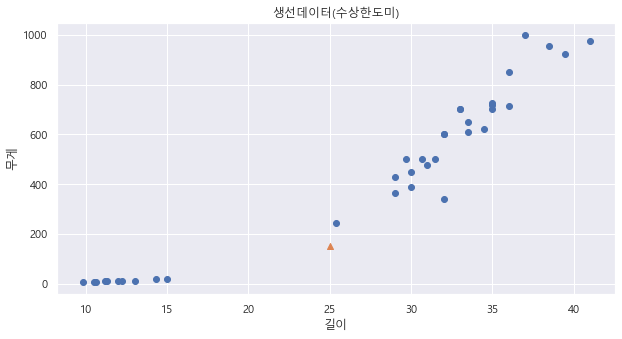

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0], y=train_input[:,1])
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^')
plt.title('생선데이터(수상한도미)')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

##### k-최근접 이웃을 찾아주는 함수

kneighbors()

In [48]:
distance, indices = kn.kneighbors([weird_bream])
distance

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [49]:
indices

array([[21, 33, 19, 30,  1]], dtype=int64)

In [50]:
train_input[indices]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

##### 찾아낸 이웃값들을 산점도에 표시

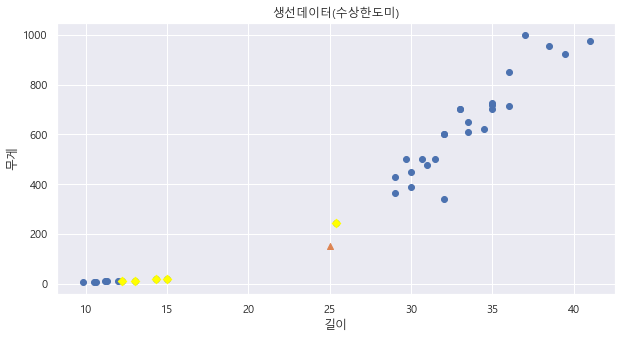

In [51]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0], y=train_input[:,1])     # 전체 생선데이터
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^')     # 예측 생선 데이터
plt.scatter(x=train_input[indices,0], y=train_input[indices,1], marker='D', color='yellow')     # k-최근접 이웃으로 도출된 데이터
plt.title('생선데이터(수상한도미)')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

#### 이유

x축은 단위가 5로, y축은 단위가 200

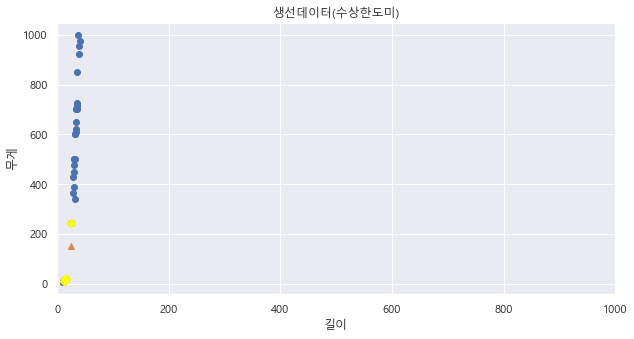

In [52]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0], y=train_input[:,1])     # 전체 생선데이터
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^')     # 예측 생선 데이터
plt.scatter(x=train_input[indices,0], y=train_input[indices,1], marker='D', color='yellow')     # k-최근접 이웃으로 도출된 데이터
plt.xlim(0,1000)    # x축 좌표를 1000까지해서 그리드 단위를 맞춰줌
plt.title('생선데이터(수상한도미)')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

#### 데이터 전처리가 필요하다

In [53]:
# 표준점수로 바꾸기 = 정규화
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


#### 표준점수 도출
- 도출한 평균과 표준편차로 변경된 스케일 데이터를 추출
    - (실제값 - 평균값) / 표준편차

In [56]:
train_scaled = (train_input - mean) / std

#### weird_bream 도 표준점수화

In [59]:
weird_scaled = (weird_bream - mean) /std
weird_scaled

array([-0.23012627, -0.94060693])

#### 재훈련

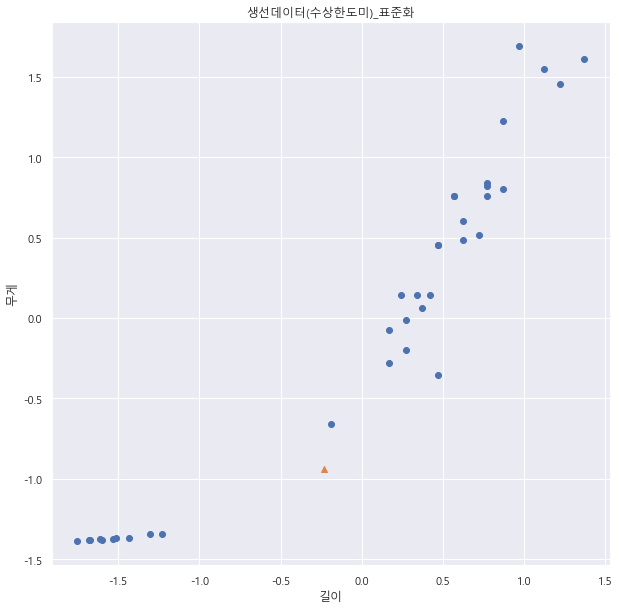

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])     # 전체 생선데이터
plt.scatter(x=weird_scaled[0], y=weird_scaled[1], marker='^')     # 예측 생선 데이터
# plt.scatter(x=train_input[indices,0], y=train_input[indices,1], marker='D', color='yellow')     # k-최근접 이웃으로 도출된 데이터
plt.title('생선데이터(수상한도미)_표준화')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [64]:
test_scaled = (test_input - mean) / std

In [63]:
kn.fit(X= train_scaled, y=train_target)

KNeighborsClassifier()

In [65]:
kn.score(X=test_scaled, y=test_target)

1.0

In [66]:
kn.predict(X=[weird_scaled])

array([1.])

#### 산점도에서 다시 확인

In [69]:
dist, inds = kn.kneighbors([weird_scaled])
print((dist, inds))

(array([[0.2873737 , 0.7711188 , 0.89552179, 0.91493515, 0.95427626]]), array([[21, 14, 34, 32,  5]], dtype=int64))


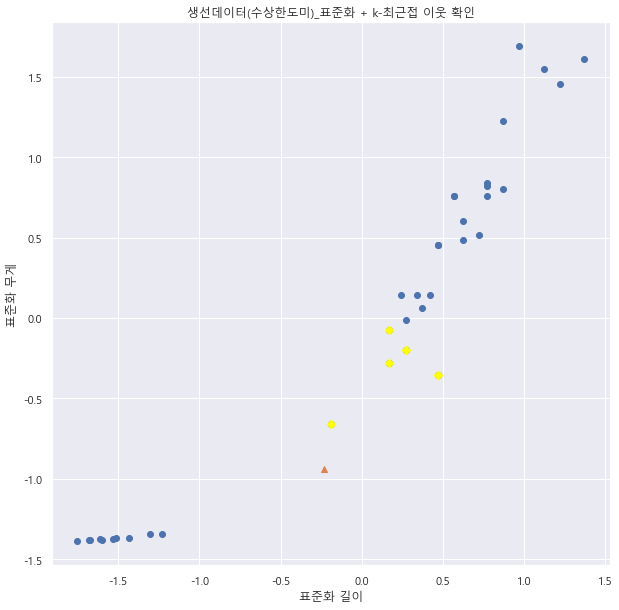

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])     # 전체 생선데이터
plt.scatter(x=weird_scaled[0], y=weird_scaled[1], marker='^')     # 예측 생선 데이터
plt.scatter(x=train_scaled[inds,0], y=train_scaled[inds,1], marker='D', color='yellow')     # k-최근접 이웃으로 도출된 데이터
plt.title('생선데이터(수상한도미)_표준화 + k-최근접 이웃 확인')
plt.xlabel('표준화 길이')
plt.ylabel('표준화 무게')
plt.show()

In [79]:
new_smelt = np.array([10.0, 8.7])
new_smelt_scaled = (new_smelt - mean) / std
new_smelt_scaled

array([-1.73276452, -1.37766373])

In [80]:
weird_scaled

array([-0.23012627, -0.94060693])

In [76]:
kn.predict(new_smelt_scaled)

array([0.])

In [81]:
dist, inds = kn.kneighbors([new_smelt_scaled])
print((dist, inds))

(array([[0.02096849, 0.05022528, 0.0603351 , 0.1202592 , 0.13022865]]), array([[22, 24, 26, 11,  3]], dtype=int64))


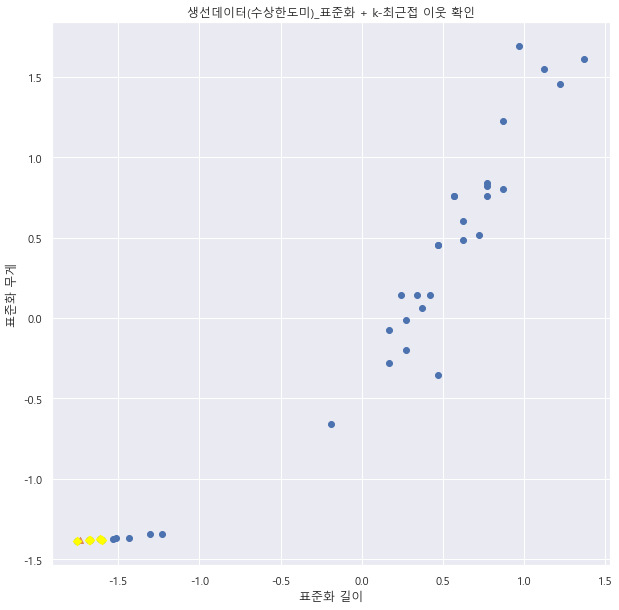

In [82]:
plt.figure(figsize=(10,10))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])     # 전체 생선데이터
plt.scatter(x=new_smelt_scaled[0], y=new_smelt_scaled[1], marker='^')     # 예측 생선 데이터
plt.scatter(x=train_scaled[inds,0], y=train_scaled[inds,1], marker='D', color='yellow')     # k-최근접 이웃으로 도출된 데이터
plt.title('생선데이터(수상한도미)_표준화 + k-최근접 이웃 확인')
plt.xlabel('표준화 길이')
plt.ylabel('표준화 무게')
plt.show()